# Analysing CCSD Organic Molecules

Calculate parameters of interest

In [1]:
import pandas as pd
from wren_code.utils import count_wyks, count_params, count_distinct_wyckoff_letters, return_spacegroup_number
import pandas as pd
from tqdm import tqdm

df_organic = pd.read_csv("csd_organic.csv")

tqdm.pandas()
df_organic['n_atoms'] = df_organic['wyckoff'].progress_apply(count_wyks)
df_organic['n_wyk'] = df_organic['wyckoff'].progress_apply(count_distinct_wyckoff_letters)
df_organic['spg'] = df_organic['wyckoff'].progress_apply(return_spacegroup_number)
df_organic['n_param'] = df_organic['wyckoff'].progress_apply(count_params)


100%|██████████| 363503/363503 [00:09<00:00, 39731.57it/s]


In [2]:
from ccdc import io, utilities

csd_reader = io.EntryReader('/Applications/CCDC/CSD_2022/DATA/CSD_543/as543be_ASER.sqlite')
# entry = csd_reader.entry('CAXZEG')
# entry = csd_reader.entry('ADAGES')

entry_name = 'WOPTAY'
entry = csd_reader.entry(entry_name)
crystal = entry.crystal

print(f'SMILES: {crystal.molecule.smiles}')
print(f'Crystal System: {crystal.crystal_system}')
print(f'Spacegroup Symbol: {crystal.spacegroup_symbol}')
print(f'Spacegroup Number: {crystal.spacegroup_number_and_setting}')
print(f'Has disorder: {crystal.has_disorder}')
print(f'Disorder details: {entry.disorder_details}')

print('\n'.join('%-17s %s' % (op, utilities.print_set(crystal.atoms_on_special_positions(op))) for op in crystal.symmetry_operators))

SMILES: F[P-](F)(F)(F)(F)F.F[P-](F)(F)(F)(F)F.F[P-](F)(F)(F)(F)F.COc1ccc(cc1)[C+](c1ccc(OC)cc1)c1c2ccccc2c([C+](c2ccc(OC)cc2)c2ccc(OC)cc2)c2ccccc12
Crystal System: tetragonal
Spacegroup Symbol: P4/m
Spacegroup Number: (83, 1)
Has disorder: False
Disorder details: None
x,y,z             {Atom(C1), Atom(C10), Atom(C10B), Atom(C10D), Atom(C10F), Atom(C11), Atom(C11B), Atom(C11D), Atom(C11F), Atom(C12), Atom(C12B), Atom(C12D), Atom(C12F), Atom(C1B), Atom(C1D), Atom(C1F), Atom(C2), Atom(C2B), Atom(C2D), Atom(C2F), Atom(C3), Atom(C3B), Atom(C3D), Atom(C3F), Atom(C4), Atom(C4D), Atom(C5), Atom(C5D), Atom(C6), Atom(C6B), Atom(C6D), Atom(C6F), Atom(C7), Atom(C7B), Atom(C7D), Atom(C7F), Atom(C8), Atom(C8B), Atom(C8D), Atom(C8F), Atom(C9), Atom(C9B), Atom(C9D), Atom(C9F), Atom(F1), Atom(F1D), Atom(F2), Atom(F2A), Atom(F2B), Atom(F2C), Atom(F3), Atom(F3B), Atom(F4), Atom(F4D), Atom(F5), Atom(F5B), Atom(F6), Atom(F7), Atom(F7A), Atom(F7B), Atom(F7C), Atom(F8), Atom(H1), Atom(H1B), Atom(H1D), Atom(H

In [3]:
smiles_groups = df_organic.groupby('smiles')
print(df_organic.query('smiles.duplicated()').sort_values(by='smiles').dropna())

       identifier                                             smiles  \
179039   MOMVIV01                                  Br.OC(=O)c1ccccn1   
94325    GEQXUV01         BrB(Br)(Br)[P](c1ccccc1)(c1ccccc1)c1ccccc1   
358392   FAXKUM01                                BrB(Br)c1ccc(Br)cc1   
27071    BRDCBO01  BrB1234[BH]567[BH]891[BH]1%105[BH]5%116[BH]627...   
58250    DOXABR12                                      BrBr.C1COCCO1   
...           ...                                                ...   
278651   TRIZIN04                                           c1ncncn1   
278652   TRIZIN05                                           c1ncncn1   
278653   TRIZIN06                                           c1ncncn1   
271929   TETRAZ02                                           c1nncnn1   
47430    DAHPIL01  c1scc2c1c1cscc1c1cscc1c1cscc21.c1scc2c1c1cscc1...   

                                              wyckoff  n_atoms  n_wyk spg  \
179039        AB6C6DE2_aP32_2_i_6i_6i_i_2i:Br-C-H-N-O     

In [4]:
df_organic.query('identifier=="AFUHAN"').wyckoff.values

array(['A29B4C17D2E3F_mC224_12_g2h13j_2j_h8j_j_gj_g:C-F-H-I-N-O'],
      dtype=object)

In [5]:
print(len(df_organic.wyckoff.unique()))

257259


In [6]:
df_organic.query('n_wyk > 7').head(n=10)

,identifier,smiles,wyckoff,n_atoms,n_wyk,spg,n_param
317038,WOPTAY,F[P-](F)(F)(F)(F)F.F[P-](F)(F)(F)(F)F.F[P-](F)...,A88B30C72D8E5_tP203_83_2i10l_g2hi2jkl_9l_l_beh...,33,8,83,78
333133,XUTPOR02,CN1C=C[N+](=C1)C.F[P-](F)(F)(F)(F)F.F[P-](F)(F...,A5B6C15D2E_tI232_140_g2l_2fik_gl3m_l_ac:C-F-H-N-P,15,8,140,26


Number of wyckoff letters

<AxesSubplot:>

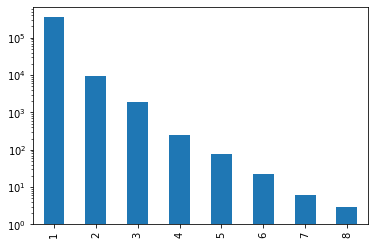

In [7]:
df_organic.n_wyk.value_counts().plot(kind='bar', log=True)

<AxesSubplot:>

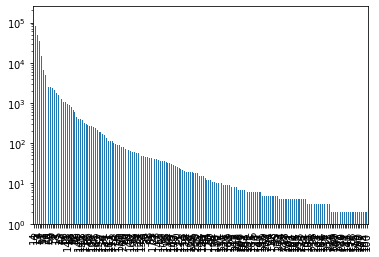

In [8]:
df_organic.spg.value_counts().plot(kind='bar', log=True)

In [9]:
# df_organic.spg.astype(int).plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

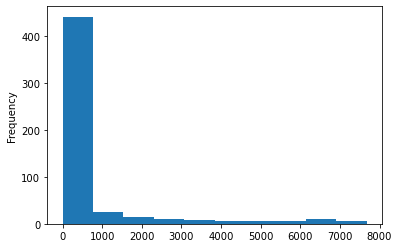

In [10]:
df_organic.n_atoms.value_counts().plot(kind='hist')

Tokenize SMILES and wyckoff rep

In [11]:
from wren_code.utils import tokenize_prototype_label, tokenize_pearson_label
import pandas as pd
from tqdm import tqdm

df_organic = pd.read_csv("csd_organic.csv")

tqdm.pandas()
df_organic['prototype'] = df_organic['wyckoff'].progress_apply(tokenize_prototype_label)
df_organic['pearson'] = df_organic['wyckoff'].progress_apply(tokenize_pearson_label)
df_organic

100%|██████████| 363503/363503 [00:01<00:00, 249721.90it/s]


,identifier,smiles,wyckoff,prototype,pearson
0,AABHTZ,CC(=O)NN1C=NN=C1N(N=Cc1c(Cl)cccc1Cl)C(C)=O,A13B2C12D6E2_aP70_2_13i_2i_12i_6i_2i:C-Cl-H-N-O,A 13 B 2 C 12 D 6 E 2,a P 70
1,AACFAZ10,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,A13BC11DE3_oP232_60_13d_d_11d_d_3d:C-Cl-H-N-O,A 13 B C 11 D E 3,o P 232
2,AACMHX10,CC(=O)OC(=C1CCCCC1c1ccccc1)c1ccccc1,A21B22C2_oP360_61_21c_22c_2c:C-H-O,A 21 B 22 C 2,o P 360
3,AADAMC,[Br-].[NH3+]C1(C2CC3CC(C2)CC1C3)C(O)=O,AB11C18DE2_mP132_14_e_11e_18e_e_2e:Br-C-H-N-O,A B 11 C 18 D E 2,m P 132
4,AADMPY10,Cc1[nH+]c(N)nc(N)c1C12CC3CC(CC(C3)C1)C2.CCS(=O...,A17B28C4D3E_aP106_2_17i_28i_4i_3i_i:C-H-N-O-S,A 17 B 28 C 4 D 3 E,a P 106
...,...,...,...,...,...
363498,ZUWRIS01,Oc1ccccc1C=NNS(=O)(=O)c1ccccc1,A13B12C2D3E_mP124_14_13e_12e_2e_3e_e:C-H-N-O-S,A 13 B 12 C 2 D 3 E,m P 124
363499,ZZZDTW01,OC(=O)CC(O)(CC(O)=O)C(=O)[O-].[NH4+],A6B11CD7_aP50_2_6i_ac10i_i_7i:C-H-N-O,A 6 B 11 C D 7,a P 50
363500,ZZZJCQ04,c1ccc(cc1)N(c1ccccc1)c1ccccc1.c1ccc(cc1)N(c1cc...,A18B15C_mC544_9_72a_60a_4a:C-H-N,A 18 B 15 C,m C 544
363501,ZZZPTQ01,[NH3+]CC(=O)NCC(=O)NCC(=O)[O-].O.O,A2B5CD2_oP120_29_6a_15a_3a_6a:C-H-N-O,A 2 B 5 C D 2,o P 120


In [12]:
import re

def tokenize_smiles(smi):
    """
    Tokenize a SMILES molecule or reaction 
    """
    pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"

    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    smi_tokenized = ' '.join(tokens)
    return smi_tokenized

df_organic = df_organic.dropna()

df_organic['smi_tokenized'] = df_organic['smiles'].progress_apply(tokenize_smiles)


<>:7: DeprecationWarning: invalid escape sequence \[
<>:7: DeprecationWarning: invalid escape sequence \[
<>:7: DeprecationWarning: invalid escape sequence \[
/var/folders/b1/zflg536s6rvg62mcvlc7dnnw0000gn/T/ipykernel_71862/3494110355.py:7: DeprecationWarning: invalid escape sequence \[
  pattern = "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
100%|██████████| 361607/361607 [00:05<00:00, 62313.45it/s]
/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
len(df_organic.pearson.unique())

3652

In [14]:
df_organic['tgt'] = df_organic['prototype'] + ': ' + df_organic['pearson']
df_organic

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,identifier,smiles,wyckoff,prototype,pearson,smi_tokenized,tgt
0,AABHTZ,CC(=O)NN1C=NN=C1N(N=Cc1c(Cl)cccc1Cl)C(C)=O,A13B2C12D6E2_aP70_2_13i_2i_12i_6i_2i:C-Cl-H-N-O,A 13 B 2 C 12 D 6 E 2,a P 70,C C ( = O ) N N 1 C = N N = C 1 N ( N = C c 1 ...,A 13 B 2 C 12 D 6 E 2 : a P 70
1,AACFAZ10,COC1=C(C(OC1=O)c1ccccc1Cl)C(C)=NN=C(C)C1=C(OC)...,A13BC11DE3_oP232_60_13d_d_11d_d_3d:C-Cl-H-N-O,A 13 B C 11 D E 3,o P 232,C O C 1 = C ( C ( O C 1 = O ) c 1 c c c c c 1 ...,A 13 B C 11 D E 3 : o P 232
2,AACMHX10,CC(=O)OC(=C1CCCCC1c1ccccc1)c1ccccc1,A21B22C2_oP360_61_21c_22c_2c:C-H-O,A 21 B 22 C 2,o P 360,C C ( = O ) O C ( = C 1 C C C C C 1 c 1 c c c ...,A 21 B 22 C 2 : o P 360
3,AADAMC,[Br-].[NH3+]C1(C2CC3CC(C2)CC1C3)C(O)=O,AB11C18DE2_mP132_14_e_11e_18e_e_2e:Br-C-H-N-O,A B 11 C 18 D E 2,m P 132,[Br-] . [NH3+] C 1 ( C 2 C C 3 C C ( C 2 ) C C...,A B 11 C 18 D E 2 : m P 132
4,AADMPY10,Cc1[nH+]c(N)nc(N)c1C12CC3CC(CC(C3)C1)C2.CCS(=O...,A17B28C4D3E_aP106_2_17i_28i_4i_3i_i:C-H-N-O-S,A 17 B 28 C 4 D 3 E,a P 106,C c 1 [nH+] c ( N ) n c ( N ) c 1 C 1 2 C C 3 ...,A 17 B 28 C 4 D 3 E: a P 106
...,...,...,...,...,...,...,...
363498,ZUWRIS01,Oc1ccccc1C=NNS(=O)(=O)c1ccccc1,A13B12C2D3E_mP124_14_13e_12e_2e_3e_e:C-H-N-O-S,A 13 B 12 C 2 D 3 E,m P 124,O c 1 c c c c c 1 C = N N S ( = O ) ( = O ) c ...,A 13 B 12 C 2 D 3 E: m P 124
363499,ZZZDTW01,OC(=O)CC(O)(CC(O)=O)C(=O)[O-].[NH4+],A6B11CD7_aP50_2_6i_ac10i_i_7i:C-H-N-O,A 6 B 11 C D 7,a P 50,O C ( = O ) C C ( O ) ( C C ( O ) = O ) C ( = ...,A 6 B 11 C D 7 : a P 50
363500,ZZZJCQ04,c1ccc(cc1)N(c1ccccc1)c1ccccc1.c1ccc(cc1)N(c1cc...,A18B15C_mC544_9_72a_60a_4a:C-H-N,A 18 B 15 C,m C 544,c 1 c c c ( c c 1 ) N ( c 1 c c c c c 1 ) c 1 ...,A 18 B 15 C: m C 544
363501,ZZZPTQ01,[NH3+]CC(=O)NCC(=O)NCC(=O)[O-].O.O,A2B5CD2_oP120_29_6a_15a_3a_6a:C-H-N-O,A 2 B 5 C D 2,o P 120,[NH3+] C C ( = O ) N C C ( = O ) N C C ( = O )...,A 2 B 5 C D 2 : o P 120


In [15]:
df_organic = df_organic.drop_duplicates(subset=['smiles'])
df_train_and_val = df_organic.sample(frac=0.9, random_state=42)
df_test = df_organic.drop(df_train_and_val.index)

df_train = df_train_and_val.sample(frac=0.9, random_state=42)
df_valid = df_train_and_val.drop(df_train.index)

data_path = '/Users/williammccorkindale/ml_physics/smi2wyck/notebooks/data'
df_train.smi_tokenized.to_csv(f'{data_path}/src-train.csv', index=False, header=False)
df_train.tgt.to_csv(f'{data_path}/tgt-train.csv', index=False, header=False)

df_valid.smi_tokenized.to_csv(f'{data_path}/src-valid.csv', index=False, header=False)
df_valid.tgt.to_csv(f'{data_path}/tgt-valid.csv', index=False, header=False)

df_test.smi_tokenized.to_csv(f'{data_path}/src-test.csv', index=False, header=False)
df_test.tgt.to_csv(f'{data_path}/tgt-test.csv', index=False, header=False)
